In [3]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize

def generate_and_print_tautomers(mol2_file):
    # Load molecule from MOL2 file
    mol = Chem.MolFromMol2File(mol2_file, removeHs=True)
    
    if mol is None:
        print("Error: Could not read the MOL2 file.")
        return {}

    # Remove explicit hydrogens if any still exist
    mol = Chem.RemoveHs(mol)

    # Create a Tautomer Enumerator
    tautomer_enumerator = rdMolStandardize.TautomerEnumerator()

    # Get all possible tautomers and store them in a dictionary
    tautomers = tautomer_enumerator.Enumerate(mol)
    tautomer_dict = {i+1: Chem.MolToSmiles(Chem.RemoveHs(tautomer), isomericSmiles=False) for i, tautomer in enumerate(tautomers)}

    # Print all tautomers
    for index, smiles in tautomer_dict.items():
        print(f"Tautomer {index}: {smiles}")

    return tautomer_dict

# Example usage
mol2_filename = "pcb.mol2"  # Replace with your MOL2 file path
tautomers_dict = generate_and_print_tautomers(mol2_filename)


Tautomer 1: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(C=C3N=C(O)C(CC)=C3C)C(C)=C2CC=C(O)O)c(CCC(=O)O)c1C
Tautomer 2: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(C=C3N=C(O)C(CC)=C3C)C(C)=C2CCC(=O)O)c(CC=C(O)O)c1C
Tautomer 3: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(C=C3N=C(O)C(CC)=C3C)C(C)=C2CCC(=O)O)c(CCC(=O)O)c1C
Tautomer 4: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(C=C3NC(=O)C(CC)=C3C)C(C)=C2CC=C(O)O)c(CC=C(O)O)c1C
Tautomer 5: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(C=C3NC(=O)C(CC)=C3C)C(C)=C2CC=C(O)O)c(CCC(=O)O)c1C
Tautomer 6: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(C=C3NC(=O)C(CC)=C3C)C(C)=C2CCC(=O)O)c(CC=C(O)O)c1C
Tautomer 7: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(C=C3NC(=O)C(CC)=C3C)C(C)=C2CCC(=O)O)c(CCC(=O)O)c1C
Tautomer 8: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(CC3=NC(=O)C(CC)=C3C)C(C)=C2CC=C(O)O)c(CC=C(O)O)c1C
Tautomer 9: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(CC3=NC(=O)C(CC)=C3C)C(C)=C2CC=C(O)O)c(CCC(=O)O)c1C
Tautomer 10: CC=c1c(C)c(O)[nH]c1=Cc1[nH]c(C=C2N=C(CC3=NC(=O)C(CC)=C3C)C(C)=C2CCC(=O)O)c(CC=C(O)O)c1C

In [17]:
from rdkit import Chem
from rdkit.Chem import Draw

def visualize_tautomers(tautomers_dict, start, end):
    # Ensure the range is valid
    if start < 1 or end > len(tautomers_dict) or start > end:
        print(f"Error: Invalid range ({start}-{end}). Must be between 1 and {len(tautomers_dict)}.")
        return
    
    selected_mols = []
    legends = []

    for index in range(start, end + 1):
        smiles = tautomers_dict.get(index)
        if smiles:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                selected_mols.append(mol)
                legends.append(f"Tautomer {index}")

    if selected_mols:
        img = Draw.MolsToGridImage(selected_mols, molsPerRow=5, subImgSize=(300, 300), legends=legends)
        display(img)
    else:
        print("Error: No valid molecules found in the specified range.")

# Example usage: Visualizing tautomers from index 1 to 10
visualize_tautomers(tautomers_dict, 301,307)

TypeError: visualize_tautomers() missing 1 required positional argument: 'end'

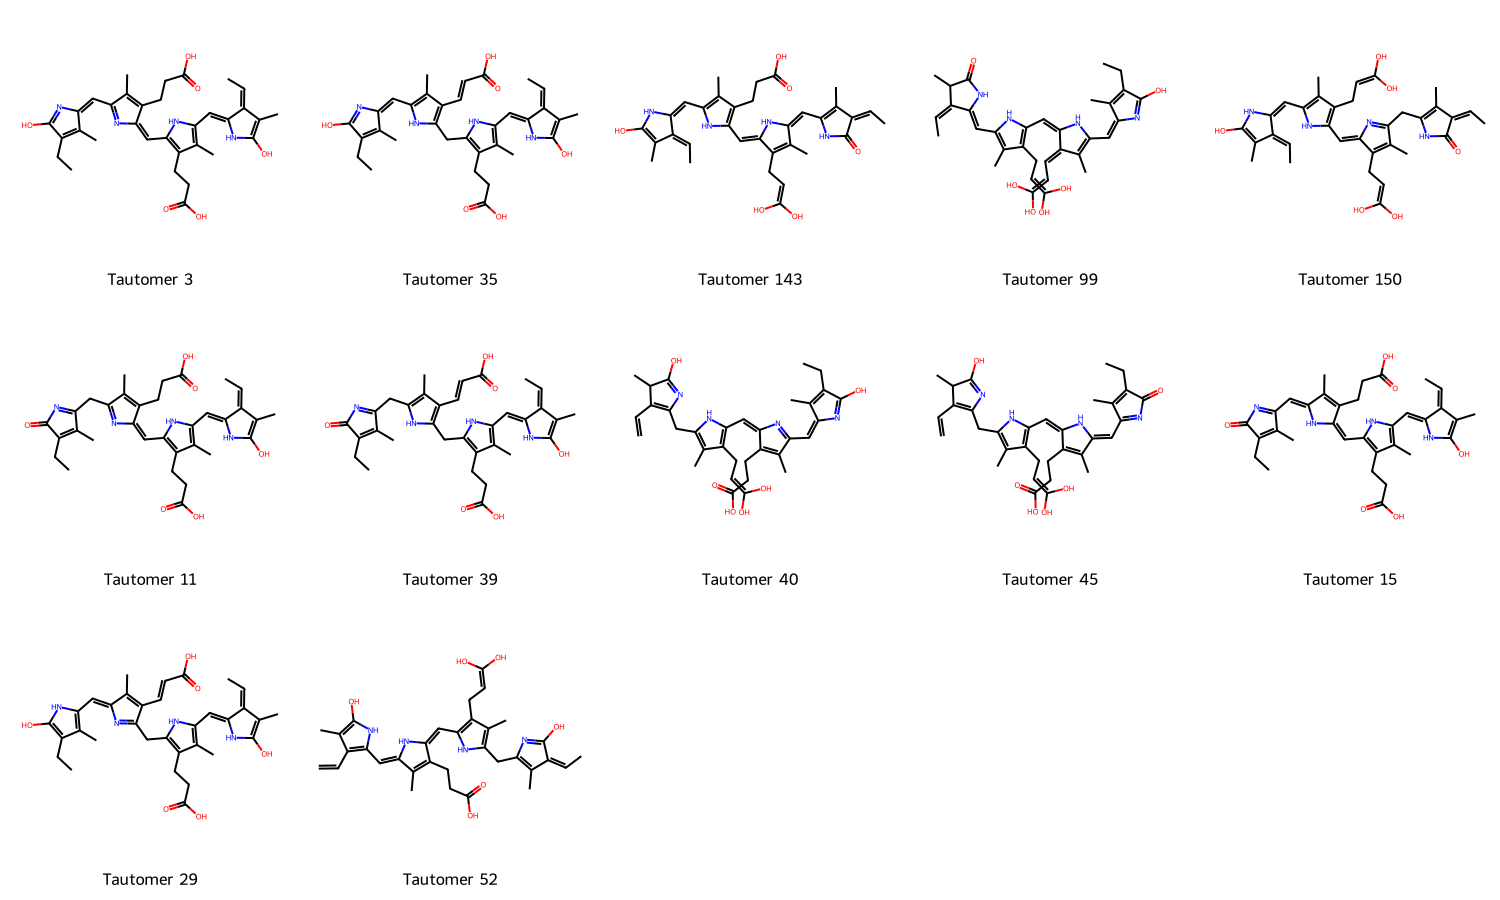

In [19]:

def visualize_tautomers(tautomers_dict, indices):
    if not isinstance(indices, list):
        print("Error: Please provide a list of indices.")
        return

    selected_mols = []
    legends = []

    for index in indices:
        if index in tautomers_dict:
            smiles = tautomers_dict[index]
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                selected_mols.append(mol)
                legends.append(f"Tautomer {index}")
        else:
            print(f"Warning: Tautomer {index} is not in the dataset.")

    if selected_mols:
        img = Draw.MolsToGridImage(selected_mols, molsPerRow=5, subImgSize=(300, 300), legends=legends)
        display(img)
    else:
        print("Error: No valid molecules found in the specified indices.")

# Example usage: Visualizing specific tautomers
visualize_tautomers(tautomers_dict, [3, 35, 143, 99, 150, 11, 39, 40, 45, 15, 29, 52])
